In [12]:
import numpy as np

from data_cube import DataCube
from ssm import SSM

In [13]:
dc = DataCube(
    subjects="all",
    gestures=["1", "2", "3", "4"],
    data_grp="subsample"
)
dc.load_data()

In [16]:
ed = lambda i, j: (i-j)**2
s1g102 = SSM(dc.data_set["01"]["1_0_2"][:, :-1], metric=ed) # exclude label col
s1g102.normalize_SSM()
s1g102.calc_SSM()

In [18]:
s1g102.mods.std(axis=0)

array([1., 1., 1., 1., 1.])

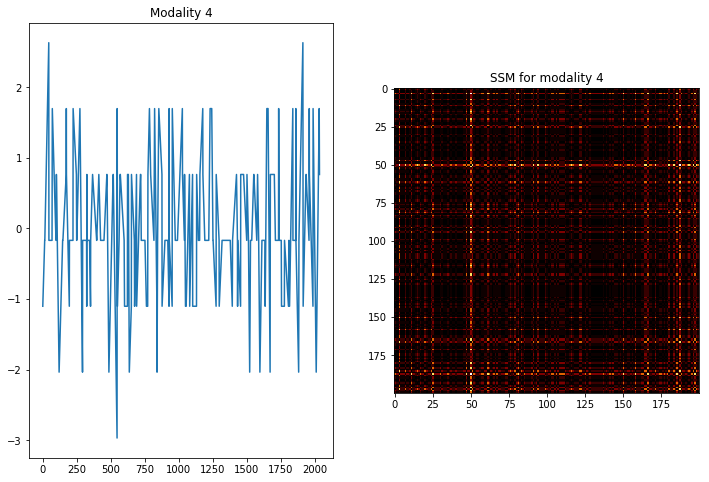

In [21]:
s1g102.plot_SSM(4)

---

Testing interpolate

In [ ]:
from math import sin

In [ ]:
N=200
x=np.linspace(0,2*np.pi,N)
y=np.zeros(N)
for i in range(N):
    y[i] = sin(x[i])
a=np.c_[x, y]

In [ ]:
t = SSM(a, ed)
t.calc_SSM()

In [ ]:
t.plot_SSM(0)